### Problem Statement
• DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

    • Customers who left within the last month – the column is called Churn
    
    • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, 
    device protection, tech support, and streaming TV and movies
    
    • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
    • Demographic info about customers – gender, age range, and if they have partners and dependents
    
• PROJECT OBJECTIVE: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention

In [508]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Q1. Data Understanding & Exploration: [5 Marks]

    A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
    
    B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]
    
    C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
    
    D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks

In [509]:
#Q1 A: Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
data1= pd.read_csv('TelcomCustomer-Churn_1.csv')
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [510]:
#Q1 B: Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.
data2= pd.read_csv('TelcomCustomer-Churn_2.csv')
data2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [511]:
#Q1 C: Merge both the DataFrames on key ‘customerID’ to form a single DataFrame            

Before merging the dataframes, lets just check the data types of Customer IDs, and unique counts and whether all the customerIDs are same or not.

In [512]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [513]:
data1['customerID'].nunique()

7043

In [514]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [515]:
data2['customerID'].nunique()

7043

In [516]:
#Match the customerIDs in both the dataframes if they are all same or not. If it's all matching, it will return Null 
Match = data1['customerID'].isin(data2['customerID'])
Match[Match==False]

Series([], Name: customerID, dtype: bool)

data1 has 10 columns & 7043 rows whereas data2 has 12 columns & 7043 rows.

In both the dataframes the customerID is object datatype & have unique 7043 unique ids. I also matched the customer IDs in both the dataframe and found that all are matching (returned empty series above), hence we can go ahead and merge the dataframes.

In [517]:
#Merging both the dataframes
df= pd.merge(data1,data2,on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [518]:
#Q1 D: Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

##### There are multiple methods of checking whether all the columns are merged or not. Few are as below:

1) As in the question, it's asked to use simple comparison operator, we can try by comparing the number of columns in data1 & data2 with df. Ideally columns in data1 + columns in data2 -1 should be equal to columns in df. (-1 as customerID will not be repated while merging)
2) We can also check the column names whether they are same or not.
3) We can also check by passing info() to see the number of columns and column names.

In [519]:
#Checking the number of columns in data1 & data 2 and it should be 1 more than columns in df
if  len(df.columns)==(len(data1.columns)+len(data2.columns)-1):
    print('The merget dataframe has all the columns incorporated from data1 & data2')

The merget dataframe has all the columns incorporated from data1 & data2


In [520]:
#After checking the count, checking if the names are also same. If result is True, it means name is exactly same.
data1.match = data1.columns.isin(df.columns)
data2.match = data2.columns.isin(df.columns)
print(data1.match)
print(data2.match)

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It shows that after merging there are 21 columns & 7043 rows. In data1, there were 10 columns and data2 there were 12 columns. After ignoring 1 customerID column either from data1 & data2 , there should be 21 columns and 7043 rows which is correct.

#### Q2. Data Cleaning & Analysis: [15 Marks]

A. Impute missing/unexpected values in the DataFrame. [2 Marks]

B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks] \
    [For Example: MonthlyCharges, TotalCharges]
    
C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

D. Share insights for Q2.c. [2 Marks]

E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

F. Split the data into 80% train and 20% test. [1 Marks]

G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [522]:
#Q2 A: Impute missing/unexpected values in the DataFrame.
#check the values in each column in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [523]:
for col in df:
    print(df[col].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

Total Charges column has float values but it shows as object. I can notice there are 11 blank values due to which it is showing as Object. This needs to be either imputed or deleted. I will dig a little deeper to understand the pattern.


In [524]:
df[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [525]:
df[df['tenure']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


This is clearly evident that if tenure is 0, the Total charges are blank. This means that they haven't been a customer from long time and hence shouldn't be the focus for telecom company. As the aim is to develop focused customer retention programs, the new customers may not be the focus to determine the churn. Hence these 11 entries can be dropped from the data (it accounts 0.15% of the enitre data).

In [526]:
#dropping the rows where Total Charges are empty string
rows_to_drop = df[df['TotalCharges']==' '].index
df.drop(rows_to_drop, inplace=True)
df.shape

(7032, 21)

In [527]:
#Q2 B: Make sure all the variables with continuous values are of ‘Float’ type.
df.info()  #checking the datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Monthly Charges & Total Charges should be float values and here it can be seen that TotalCharges is an object, hence will change the data type of Total Charges. \
Senior Citizen column is also int data type rather it should be an object with binary values, will transform that as well.

In [528]:
df['TotalCharges']= df['TotalCharges'].astype(float)
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [529]:
df.info() #checking if the data types are changed or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [530]:
#Q2 C:  Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical 
# features. Clearly show percentage distribution in the pie-chart

def plot_pie(column):
    df[i].value_counts(normalize=True).plot(kind='pie', autopct='%.2f')

In [531]:
#selecting only the appropriate categorical columns"
columns=df.select_dtypes(include=["object","category"]).columns.tolist()
columns = columns[1:]
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

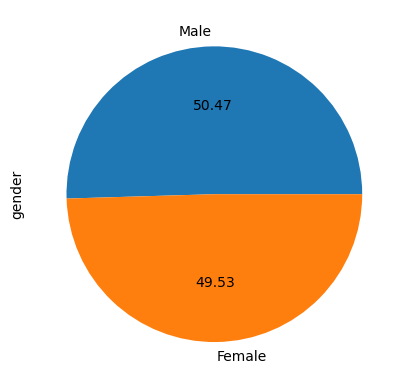

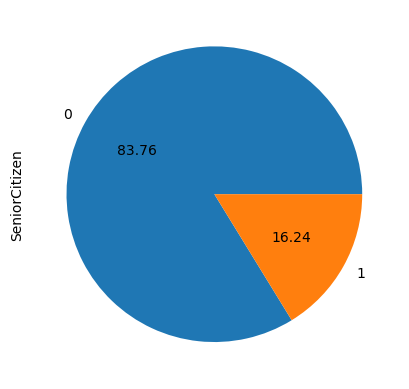

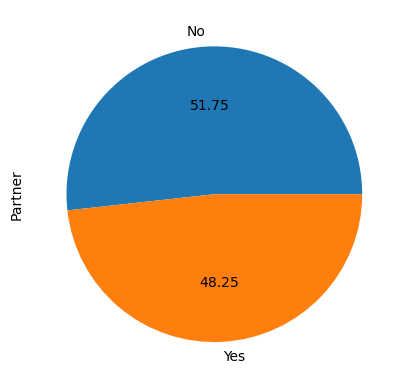

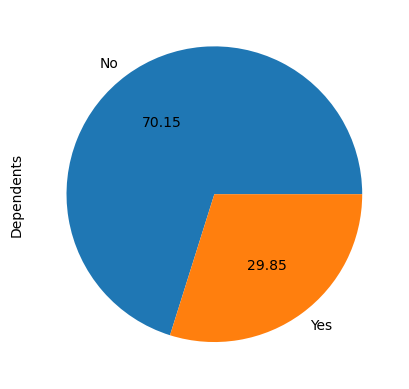

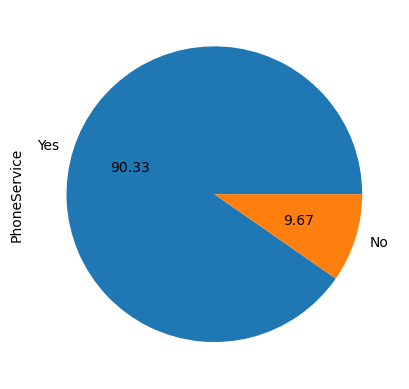

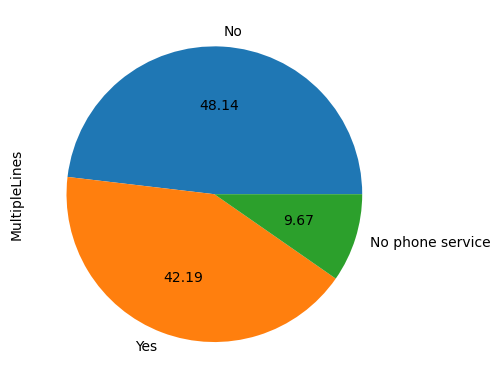

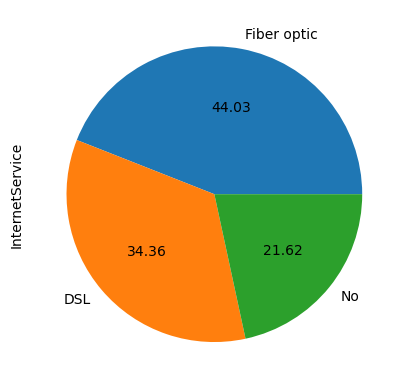

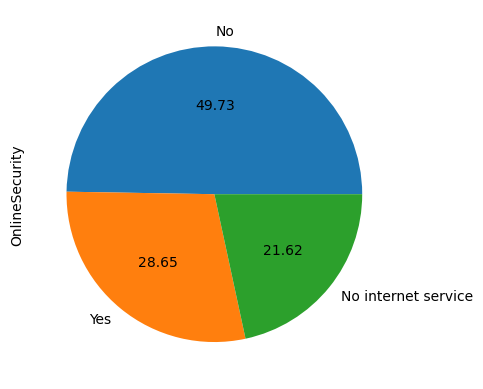

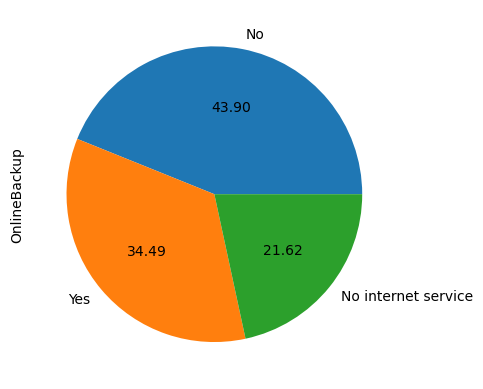

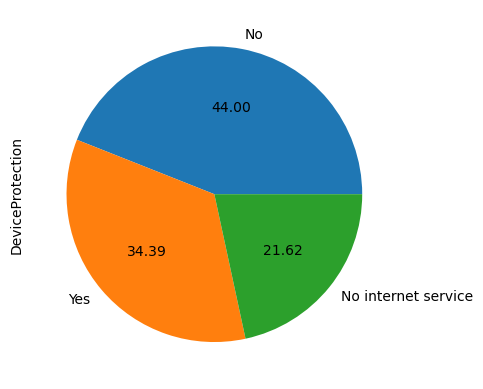

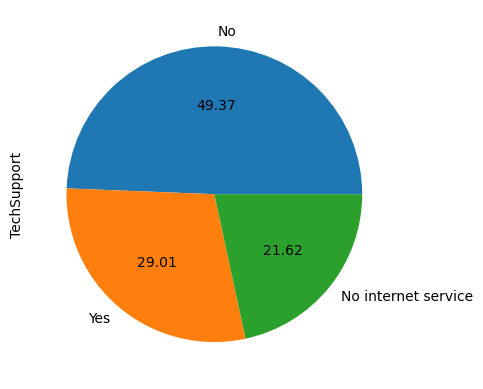

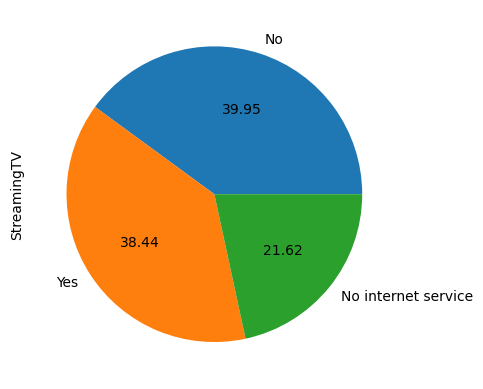

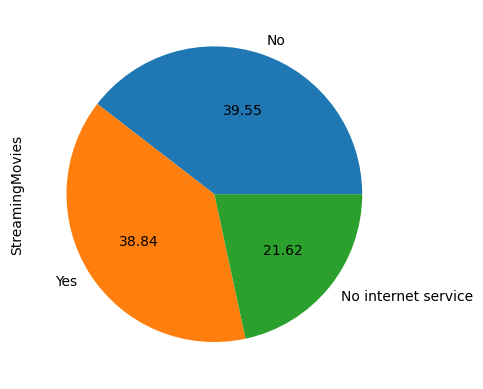

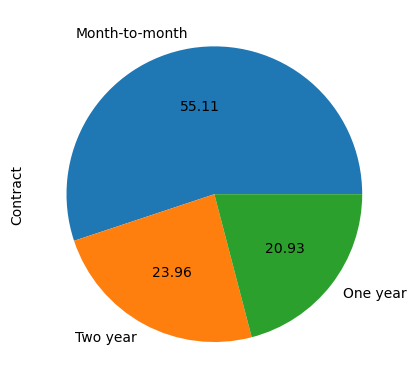

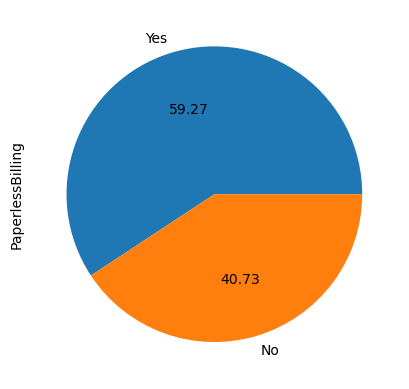

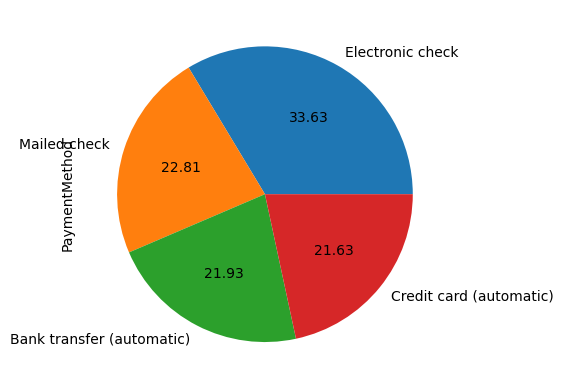

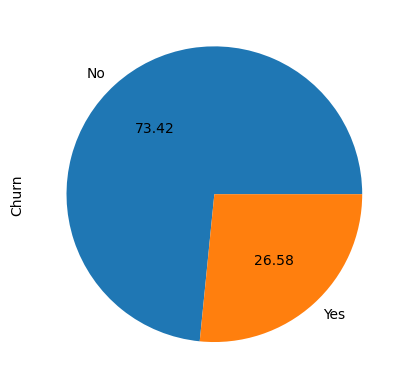

In [532]:
#plotting pie chart for above categorical columns
for i in columns:
    #print(df[i].name)
    plot_pie(df[i])
    plt.show()

In [533]:
#Q2 D:  Share insights for Q2.c.

###### Key Insights
Gender is almost equally divided between Male & Female  with 50.47% & 49.53% respectively.

16.24% of customers are Senior Citizen, 83.76% are not.

51.75% of customers have no partners whereas 48.25%do have partners.

70.15% of customers have no dependents whereas 29.85% do have dependents.

90.33% of customers have phone service and rest (9.67%) don't have phone service.

48.14% don't have multiple lines and as 9.67% have no phone service, hence categorized as 'No phone service' under Multiple Lines. Rest 42.19% do have multiple lines.

Regarding Internet Service, Fiber optic contributes the highest(44.03%), DSL is 34.36%  and 21.62% customers have not internet service.

As 21.62% don't have internet service, hence 21.62% of all OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV & StreamingMovies  will be categorised as No internet service.

49.73% customers don't have OnlineSecurity whereas 28.65% do have OnlineSecurity.

43.90% have no OnlineBackup & 34.49% have Online backup.

44% have not subscribed for DeviceProtection whereas 34.39 have subscribed.

No TechSupport for 49.37% customers whereas 29.01% has TechSupport.

Around 39% customers don't have StreamingTV & StreamingMovies options while 38% do have these options.

Regarding contract, 55.11% customers follow Month-to-month and are the top contributors, 2 year contract is made by 23.96% customers , 20.93% customer follow one year contract.

59.27% customers prefer PaperlessBilling and 40.73% don't.

Electronic check is the top Payment Method (33.63%) followed by Mailed check (22.81%), Bank transfer(automatic) (21.93%) & lastly Credit card(automatic) (21.63%).

73.42% customers haven't churned whereas 26.58% did.

In [534]:
#Q2 E:   Encode all the appropriate Categorical features with the best suitable approach.
replaceStruct = {
                "gender":     {"Male": 1, "Female": 2},
                "Partner": {"No": 0, "Yes":1 }, "Dependents": {"No": 0, "Yes":1 }, "PhoneService": {"No": 0, "Yes":1 },
                "MultipleLines": {"No": 0,"No phone service": 1, "Yes":2 },
                "OnlineSecurity": {"No": 0,"No internet service": 1, "Yes":2 },
                "OnlineBackup": {"No": 0,"No internet service": 1, "Yes":2 },
                "DeviceProtection": {"No": 0,"No internet service": 1, "Yes":2 },
                "TechSupport": {"No": 0,"No internet service": 1, "Yes":2 },
                "StreamingTV": {"No": 0,"No internet service": 1, "Yes":2 },
                "StreamingMovies": {"No": 0,"No internet service": 1, "Yes":2 },
                "PaperlessBilling": {"No": 0, "Yes":1 },
                "Churn": {"No": 0, "Yes":1 }
}

oneHotCols=["InternetService","Contract","PaymentMethod"]

In [535]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,2,0,1,0,1,0,1,0,2,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,2,2,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,2,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,2,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [536]:
#Q2 F:   Split the data into 80% train and 20% test.
X = df.drop(["customerID","Churn"] , axis=1)
Y = df.pop("Churn")

In [537]:
Y.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=1,stratify=Y)

In [539]:
#Q2 G:   Normalize/Standardize the data with the best suitable approach.

# selecting numerical features
num_cols = ['tenure','MonthlyCharges','TotalCharges']

# apply standardization on numerical features (Standard Scaler)
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

#### Q3. Model Building
A. Train a model using Decision tree and check the performance of the model on train and test data. [4 Marks]
	
B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b. [5 Marks]

C.  Train a model using Random forest and check the performance of the model on train and test data. [4 Marks]

D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d. [5 Marks]

E. Train a model using Adaboost and check the performance of the model on train and test data. [4 Marks]

F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f. [5 Marks]

G. Train a model using GradientBoost and check the performance of the model on train and test data. [4 Marks]

H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h. [5 Marks]

I. Provide detailed analysis of the below steps 1) Compare the performance of each model in train stage and test stage 2) Provide your observation on which model performed the best 3) Provide your reasoning on why the model performed best 4) Provide your final conclusion on your observation. [4 Marks]


In [540]:
#Q3 A:   Train a model using Decision tree and check the performance of the model on train and test data.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9971555555555556
0.7178393745557925


In [541]:
#create functions to predict & print performnace metrics
def perf_metrics(model,flag=True):
    
    score_list = []
    #make prediction on train & test
    pred_train= model.predict(X_train)
    pred_test= model.predict(X_test)
    
    #calculate accuracy on train & test
    train_acc= accuracy_score(y_train,pred_train)
    test_acc= accuracy_score(y_test,pred_test)
    
    #calculate recall on train & test
    train_rec= recall_score(y_train,pred_train)
    test_rec= recall_score(y_test,pred_test)
    
    #calculate precision on train & test
    train_pre= precision_score(y_train,pred_train)
    test_pre= precision_score(y_test,pred_test)
    
    #calculate F1 score on train & test
    train_F1= f1_score(y_train,pred_train)
    test_F1= f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_rec,test_rec,train_pre,test_pre,train_F1,test_F1))
    
    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train,pred_train))
        print('Accuracy on testing data:', accuracy_score(y_test,pred_test))
        print('Recall on training data:', recall_score(y_train,pred_train))
        print('Recall on testing data:', recall_score(y_test,pred_test))
        print('Precision on training data:', precision_score(y_train,pred_train))
        print('Precision on testing data:', precision_score(y_test,pred_test))
        print('F1 score on training data:', f1_score(y_train,pred_train))
        print('F1 score on testing data:', f1_score(y_test,pred_test))
        
    return score_list

def confusion_mat(model,y_test,labels=[0, 1]):
    pred_test= model.predict(X_test)
    cm=confusion_matrix(y_test, pred_test, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

The performance metrics of Decision tree is as below: 

Accuracy on training data: 0.9971555555555556
Accuracy on testing data: 0.7178393745557925
Recall on training data: 0.9899665551839465
Recall on testing data: 0.48663101604278075
Precision on training data: 0.9993247805536799
Precision on testing data: 0.4702842377260982
F1 score on training data: 0.9946236559139785
F1 score on testing data: 0.47831800262812085


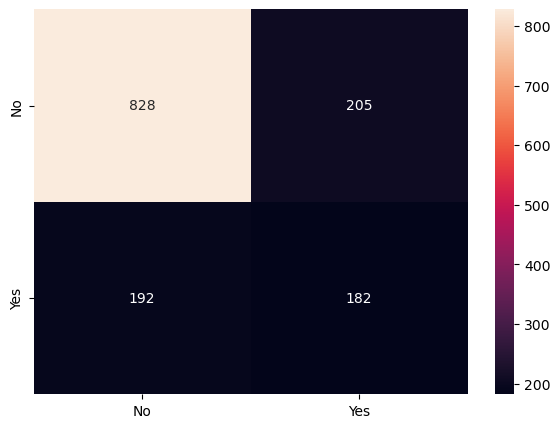

In [542]:
#make predictions and print the performance metrics
print("The performance metrics of Decision tree is as below: \n")
perf_metrics(dTree)
confusion_mat(dTree,y_test)

###### Observations
The performance report shows that the model is overfitting and hence accuracy in training data is ~ 100% whereas it reduced drastically in test data i.e. 72%. \
Same pattern can be noticed with precision, recall & F1 score as well where test recall, test precision & test F1 score has decreased alot compared to train

In [543]:
#Q3 B:   Use grid search and improve the performance of the Decision tree model , check the performance of the model on 
# train and test data , provide the differences observed in performance in Q3.a and Q3.b.

#Use differemt parameters
dtree_params = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12]}
dtree_gs = GridSearchCV(DecisionTreeClassifier(), dtree_params,cv=3)

# fit the model on our train set
dtree_g_res = dtree_gs.fit(X_train, y_train)

#get the best score
dtree_g_res.best_score_

0.7911111111111112

In [544]:
# get the hyperparameters with the best score
dtree_g_res.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [545]:
# use the best hyperparameters
dTree_best = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state=1)
dTree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

The performance metrics of Tuned Decision tree is as below: 

Accuracy on training data: 0.7925333333333333
Accuracy on testing data: 0.7761194029850746
Recall on training data: 0.36923076923076925
Recall on testing data: 0.3235294117647059
Precision on training data: 0.711340206185567
Precision on testing data: 0.6612021857923497
F1 score on training data: 0.4861294583883751
F1 score on testing data: 0.4344703770197486


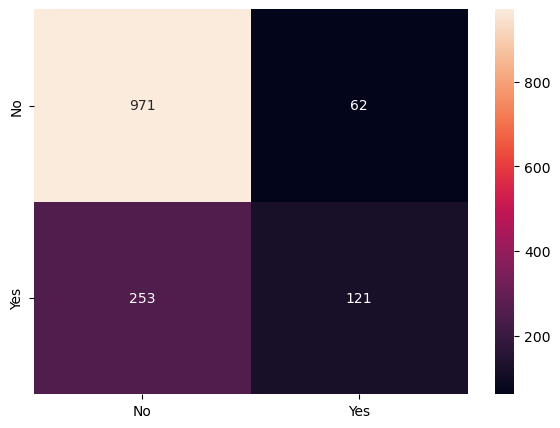

In [546]:
#make predictions and print the performnace metrics
print("The performance metrics of Tuned Decision tree is as below: \n")
perf_metrics(dTree_best)
confusion_mat(dTree_best,y_test)

###### Observations
After hypertuning the model, accuracy has improved by 6% in test data (from 72% to 78%). Now, it shows that model is not overfitting as the training data accuracy is 79% and has reduced by 21% (previously 100% & now almost similar to test data accuracy ) \
Train Recall & Test Recall both have decreased from the previous model. \
Train precision has decreased but test precision has increased substantially. \
F1 score for both training & testing has decreased.\
But still the model is not performing very good, we can try Random Forest & different gradient techniques.

In [547]:
#Q3 C:  Train a model using Random forest and check the performance of the model on train and test data. 
rf= RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

The performance metrics of Random Forest is as below: 

Accuracy on training data: 0.9971555555555556
Accuracy on testing data: 0.7853589196872779
Recall on training data: 0.9939799331103679
Recall on testing data: 0.4732620320855615
Precision on training data: 0.9953114534494307
Precision on testing data: 0.6276595744680851
F1 score on training data: 0.994645247657296
F1 score on testing data: 0.5396341463414634


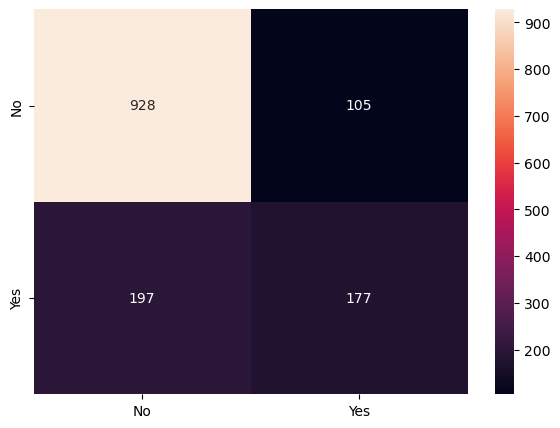

In [548]:
#make predictions and print the performance metrics
print("The performance metrics of Random Forest is as below: \n")
perf_metrics(rf)
confusion_mat(rf,y_test)

Here, we can see that the model is overfitting with very high accuracy,recall, precision & F1 score on training data. \
While, on test data we can clearly see a big decrease in accuracy,recall, precision & F1 score.

In [557]:
#Q3 D:  Use grid search and improve the performance of the Random tree model , check the performance of the model on 
# train and test data , provide the differences observed in performance in Q3.c and Q3.d.
#Use differemt parameters
rf_params = {'n_estimators':[50,100,150,200], 'max_depth': [3,5,7,9],
             'max_features':[5,6,7,8,9,10]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params,cv=3)

# fit the model on our train set
rf_g_res = rf_gs.fit(X_train, y_train)

#get the best score
rf_g_res.best_score_

0.8044444444444444

In [558]:
# get the hyperparameters with the best score
rf_g_res.best_params_

{'max_depth': 7, 'max_features': 7, 'n_estimators': 200}

In [559]:
rf_best= RandomForestClassifier(random_state=1,max_depth = 7, max_features = 7, n_estimators = 200)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=7, n_estimators=200,
                       random_state=1)

The performance metrics of Tuned Random Forest is as below: 

Accuracy on training data: 0.8248888888888889
Accuracy on testing data: 0.7974413646055437
Recall on training data: 0.5484949832775919
Recall on testing data: 0.4946524064171123
Precision on training data: 0.7256637168141593
Precision on testing data: 0.6583629893238434
F1 score on training data: 0.6247619047619049
F1 score on testing data: 0.5648854961832062


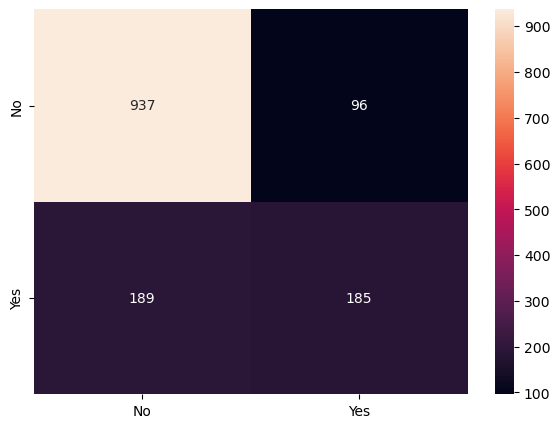

In [560]:
#make predictions and print the performnace metrics
print("The performance metrics of Tuned Random Forest is as below: \n")
perf_metrics(rf_best)
confusion_mat(rf_best,y_test)

###### Observations
Training accuracy has decreased 17% from default Random Forest model that means we reduce overfitting but there is no major change in test accuracy.\
Train recall has reduced whereas test recall increased by 2%. \
Train precision has decreased whereas test precision has increased by 3%. \
Train F1 score has reduced while test F1 score increased by 2%. \
This all shows that we have reduced overfitting but still model is not very great

In [581]:
#Q3 E:  Train a model using Adaboost and check the performance of the model on train and test data.
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

The performance metrics of AdaBoost is as below: 

Accuracy on training data: 0.808
Accuracy on testing data: 0.7938877043354655
Recall on training data: 0.5451505016722408
Recall on testing data: 0.5133689839572193
Precision on training data: 0.6707818930041153
Precision on testing data: 0.64
F1 score on training data: 0.6014760147601476
F1 score on testing data: 0.5697329376854601


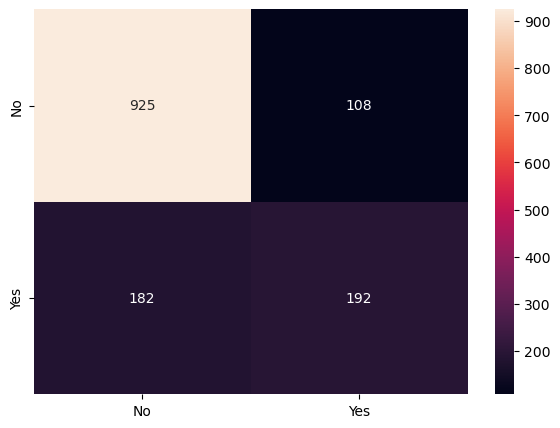

In [582]:
#make predictions and print the performance metrics
print("The performance metrics of AdaBoost is as below: \n")
perf_metrics(ada)
confusion_mat(ada,y_test)

###### Observations:
Accuracy is almost same for both train & test data (81% & 79% respectively). Recall, precision & F1 score are all around 2-4% higher in training set compared to testing set.

In [583]:
#Q3 F:  Use grid search and improve the performance of the Adaboost model , check the performance of the model on train
# and test data , provide the differences observed in performance in Q3.e and Q3.f.
ada_params = {'n_estimators':[50,100,150],'learning_rate':[0.1,0.3,0.5,0.7],
             'algorithm': ['SAMME', 'SAMME.R']}
ada_gs = GridSearchCV(ada, ada_params,cv=5)

# fit the model on our train set
ada_g_res = ada_gs.fit(X_train, y_train)

#get the best score
ada_g_res.best_score_             

0.8039111111111111

In [585]:
# get the hyperparameters with the best score
ada_g_res.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.7, 'n_estimators': 50}

In [586]:
ada_best = AdaBoostClassifier(random_state= 1,learning_rate = 0.7, n_estimators = 50,algorithm = 'SAMME.R')
ada_best.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.7, random_state=1)

The performance metrics of Tuned AdaBoost is as below: 

Accuracy on training data: 0.8126222222222222
Accuracy on testing data: 0.798862828713575
Recall on training data: 0.5672240802675586
Recall on testing data: 0.5240641711229946
Precision on training data: 0.6756972111553785
Precision on testing data: 0.6511627906976745
F1 score on training data: 0.6167272727272728
F1 score on testing data: 0.5807407407407408


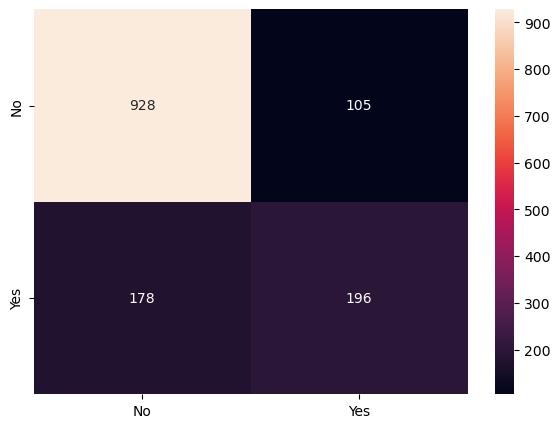

In [587]:
#make predictions and print the performance metrics
print("The performance metrics of Tuned AdaBoost is as below: \n")
perf_metrics(ada_best)
confusion_mat(ada_best,y_test)

###### Observations:
Training accuracy is same as default AdaBoost model but testing accuracy has improved a bit i.e by 1% \
Though it doesn't overfit and training & testing accuracy is almost same in the tuned AdaBoost model i.e ~80%. \
Train Recall, Train Precision & Train F1 score is increased by 1-2%. \
Test Recall, Test Precision & Train F1 score each has increased by 1% 

In [591]:
#Q3 G:  Train a model using GradientBoost and check the performance of the model on train and test data.
gb = GradientBoostingClassifier(random_state=1)
gb = gb.fit(X_train, y_train)

The performance metrics of GradientBoost is as below: 

Accuracy on training data: 0.8314666666666667
Accuracy on testing data: 0.7960199004975125
Recall on training data: 0.5792642140468227
Recall on testing data: 0.5
Precision on training data: 0.7308016877637131
Precision on testing data: 0.6515679442508711
F1 score on training data: 0.6462686567164179
F1 score on testing data: 0.5658093797276853


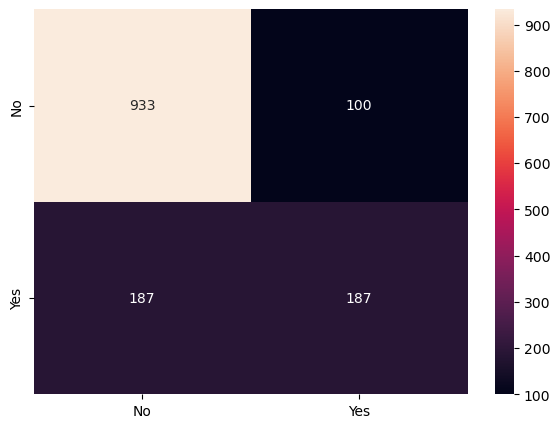

In [592]:
#make predictions and print the performance metrics
print("The performance metrics of GradientBoost is as below: \n")
perf_metrics(gb)
confusion_mat(gb,y_test)

###### Observations
Accuracy in testing data set is around 3% less than training set. \
Similarly, Recall, Precision & F1 score are also 7-8% lesser in testing data compared to training data.

In [600]:
#Q3 H:  Use grid search and improve the performance of the GradientBoost model , check the performance of the model on 
# train and test data , provide the differences observed in performance in Q3.g and Q3.h.
gb_params = {'n_estimators':[50,100,150,200,250],'learning_rate':[0.1,0.3,0.5],
            'max_depth':[3,4,5,6]}
 #min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10
gb_gs = GridSearchCV(GradientBoostingClassifier(), gb_params,cv=5)

# fit the model on our train set
gb_g_res = gb_gs.fit(X_train, y_train)

#get the best score
gb_g_res.best_score_

0.8058666666666667

In [601]:
# get the hyperparameters with the best score
gb_g_res.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [602]:
gb_best = GradientBoostingClassifier(random_state=1,learning_rate = 0.1, max_depth= 3,n_estimators = 50)
gb_best.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

The performance metrics of Tuned GradientBoost is as below: 

Accuracy on training data: 0.8227555555555556
Accuracy on testing data: 0.7953091684434968
Recall on training data: 0.5498327759197325
Recall on testing data: 0.48128342245989303
Precision on training data: 0.7172774869109948
Precision on testing data: 0.656934306569343
F1 score on training data: 0.6224914804998107
F1 score on testing data: 0.5555555555555555


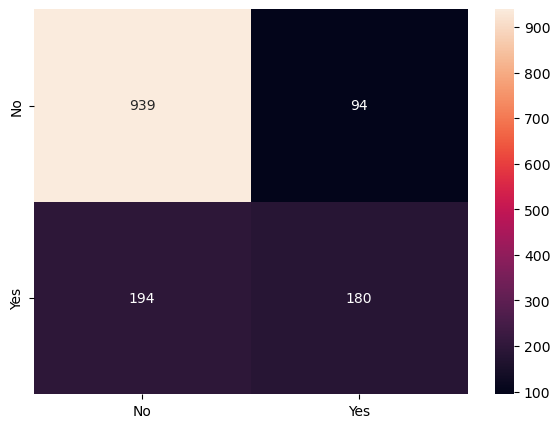

In [603]:
#make predictions and print the performance metrics
print("The performance metrics of Tuned GradientBoost is as below: \n")
perf_metrics(gb_best)
confusion_mat(gb_best,y_test)

###### Observations:

Can't see any difference in the accuracy from the Gradient Boost model with default parameters. \
Recall, precision & F1 score has also not changed alot, just +-1-2% which doesn't make the model best fit.

In [493]:
#Q3 I: Provide detailed analysis of the below steps 
# 1) Compare the performance of each model in train stage and test stage
# 2) Provide your observation on which model performed the best 
# 3) Provide your reasoning on why the model performed best 
# 4) Provide your final conclusion on your observation.


In [604]:
#Q3 I: 1) Compare the performance of each model in train stage and test stage

#Store the accuracy results for each model in a dataframe for final comparison
#defining list of models
models = [dTree,dTree_best,rf,rf_best,ada,ada_best,gb,gb_best]

#defining empty lists to add train & test results
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []

#looping through all the models
for model in models:
    j= perf_metrics(model,False)
    accuracy_train.append(np.round(j[0],2))
    accuracy_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1score_train.append(np.round(j[6],2))
    f1score_test.append(np.round(j[7],2))

In [612]:
results = pd.DataFrame({'Model':['Decision Tree with default parameters','Tuned Decision Tree',
                                 'Random Forest with default parameters','Tuned Random Forest',
                                'AdaBoost with default parameters','Tuned AdaBoost',
                                'GradientBoost with default parameters','Tuned GradientBoost'],
                         'Train accuracy': accuracy_train, 'Test accuracy': accuracy_test,
                         'Train recall': recall_train, 'Test recall': recall_test,
                         'Train precision': precision_train, 'Test precision': precision_test,
                         'Train F1 Score': f1score_train, 'Test F1 Score': f1score_test})
results


,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Decision Tree with default parameters,1.00,0.72,0.99,0.49,1.00,0.47,0.99,0.48
1,Tuned Decision Tree,0.79,0.78,0.37,0.32,0.71,0.66,0.49,0.43
2,Random Forest with default parameters,1.00,0.79,0.99,0.47,1.00,0.63,0.99,0.54
3,Tuned Random Forest,0.82,0.80,0.55,0.49,0.73,0.66,0.62,0.56
4,AdaBoost with default parameters,0.81,0.79,0.55,0.51,0.67,0.64,0.60,0.57
5,Tuned AdaBoost,0.81,0.80,0.57,0.52,0.68,0.65,0.62,0.58
6,GradientBoost with default parameters,0.83,0.80,0.58,0.50,0.73,0.65,0.65,0.57
7,Tuned GradientBoost,0.82,0.80,0.55,0.48,0.72,0.66,0.62,0.56


In [ ]:
#Q3 I:  2) Provide your observation on which model performed the best

Tuned Random Forest,Tuned Ada Boost, Gradient Boosting with default parameters, Tuned Gradient Boosting are almost performing the same with slight difference in recall, 
precision & F1 score. \
Though, these minor difference won't give a better model out of these four but I think Gradient Boosting with default parameters is the best fit model With test Accuracy as 80%, test Recall as 50%, test Precision as 65% & Test F1 score as 57%. \
All the three tuned models were quite complex and hence computationally expensive where as Gradient Boosting with default parameters is comparatively a simple one and was easy to compute and get quick & similar results.

In [610]:
#Q3 I:  3) Provide your reasoning on why the model performed best 

I think Gradient Boosting with default parameter performed quite decent as the each new model is fitting on the residuals from the previous models and hence focus more on the area where residuals are high. Later, residuals are predicted and then add to find predicted value. \
Here, it performed well in two aspects: \
        1. Accuracy is quite similar to hypertuned models \
        2. Computationally, its less expensive as its just using default parameters and not the hypertuned parameters.

In [ ]:
#Q3 I:  4) Provide your final conclusion on your observation.

Decision Tree with default parameters & Random forest with default parameters models were overfitting with 100% accuracy in training data & around 72% & 79% in testing data respectively. \
Tuned Decision tree & Tuned Random Forest comparatively performed better and were succesful in avoiding Overfitting. The results are decent (~80% in test accuracy) \
AdaBoost with default parameters & Gradient Boosting with default parameters performed quite well considering the computational expense & performance metrics, they were quite similar to Tuned Random Forest, Tuned AdaBoost, Tuned Gradient Boosting (test accuracy ~80%). \
The other performance metrics don't show a noticable improvement as well. \
Though, still the model is not exceptional, we can definetely try XGBoost, LightGBM or CatBoost to enhance the model improvement but as it is not in this project's scope, I am skipping it for now.